<a href="https://colab.research.google.com/github/enigma6174/tensorflow-learn/blob/develop/regression/introduction_to_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression With Neural Networks

**Regression** is set of statistical processes for estimating the relationships between a dependent variable and one or more independent variables. The most common form of regression is **linear regression** which basically means to find a line that most closely fits the data according to a specific mathematical equation. 

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# create features
X = np.random.randint(0, 15, size=(50))
X

array([13, 11,  0,  3, 14, 13,  7,  3,  3,  1,  9,  9, 13, 12,  5, 10,  2,
        3,  8,  2,  5,  9, 10,  4,  4,  9, 10,  0,  1,  8,  2, 11,  9, 14,
        7, 11,  5,  7,  5,  0, 12,  1,  3, 11,  5,  9,  5, 13,  4,  6])

In [3]:
# create labels where y = 3x + 1
y = np.array([((x * 3) + 1) for x in X])
y

array([40, 34,  1, 10, 43, 40, 22, 10, 10,  4, 28, 28, 40, 37, 16, 31,  7,
       10, 25,  7, 16, 28, 31, 13, 13, 28, 31,  1,  4, 25,  7, 34, 28, 43,
       22, 34, 16, 22, 16,  1, 37,  4, 10, 34, 16, 28, 16, 40, 13, 19])

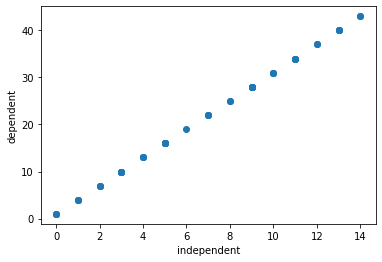

In [4]:
# plot the data
plt.scatter(X, y)
plt.xlabel('independent')
plt.ylabel('dependent')
plt.show()

In [5]:
# verify the relationship
y == 3*X + 1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [6]:
# create a tensor from the numpy arrays
t_x = tf.constant(X)
t_y = tf.constant(y)

In [7]:
t_x.shape, t_y.shape

(TensorShape([50]), TensorShape([50]))

In [8]:
t_x[0].shape, t_y[0].shape

(TensorShape([]), TensorShape([]))

In [9]:
# reshape the tensors to prepare for neural networks
t_x = tf.reshape(t_x, shape=[t_x.shape[0], 1])
t_y = tf.reshape(t_y, shape=[t_y.shape[0], 1])

In [10]:
# check the shapes
t_x.shape, t_y.shape

(TensorShape([50, 1]), TensorShape([50, 1]))

## Steps In Creating A Neural Network Model

1. **Creating The Model:** Define the input and output layers as well as the hidden layers of the deep learning model. 

2. **Compile The Model:**
  - *Loss Function* tells the model how it is doing (ie. how wrong it is)
  - *Optimizer* tells us how to improve the parameters the model is learning
  - *Evaluation Metrics* tell us what we can use to interpret the performance of our model

3. **Fitting The Model:** Letting the model find patterns between **input features** and **output labels**. This phase is called as training a model

4. **Evaluating The Model:** How reliable are our model's predictions? 


In [11]:
# set the seed for reproducibility
tf.random.set_seed(42)

# create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# fit the model
model.fit(t_x, t_y, epochs=5)

Epoch 1/5
2/2 [==============================] - 0s 8ms/step - loss: 17.4113 - mae: 17.4113
Epoch 2/5
2/2 [==============================] - 0s 5ms/step - loss: 16.4724 - mae: 16.4724
Epoch 3/5
2/2 [==============================] - 0s 5ms/step - loss: 15.5369 - mae: 15.5369
Epoch 4/5
2/2 [==============================] - 0s 5ms/step - loss: 14.6076 - mae: 14.6076
Epoch 5/5
2/2 [==============================] - 0s 5ms/step - loss: 13.6471 - mae: 13.6471


In [12]:
x_pred = tf.constant([20, 5, 10, 11])

In [13]:
# use model for prediction - ideally prediction should be close to 3*x + 1
y_pred = model.predict(x_pred) # ideally the predictions should be close to [61, 16, 31, 34]
y_pred

1/1 [==============================] - 0s 72ms/step


array([[25.030363 ],
       [ 6.3325906],
       [12.565182 ],
       [13.8117   ]], dtype=float32)

## Improving A Neural Network Model

1. **Creating The Model:** Add more layers to the model, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function etc.

2. **Compiling The Model:** Change the optimization function or perhaps the *learning rate* of the optimization function 

3. **Fitting The Model:** Train the model for more number of *epochs* or on more data (give it more examples to learn from)

In [14]:
# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# train the model - update for 100 epochs
model.fit(t_x, t_y, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 16.8602 - mae: 16.8602
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 15.9213 - mae: 15.9213
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 14.9857 - mae: 14.9857
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 14.0564 - mae: 14.0564
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 13.0960 - mae: 13.0960
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 12.1376 - mae: 12.1376
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1824 - mae: 11.1824
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 10.2181 - mae: 10.2181
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 9.2662 - mae: 9.2662
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 8.2964 - mae: 8.2964
Epoch 11/100
2/2 [==============================] - 0s 5ms/step

In [15]:
# predictions - predicted values should be closer to [61, 16, 31, 34]
y_pred = model.predict(x_pred)
y_pred

1/1 [==============================] - 0s 44ms/step


array([[61.838543],
       [16.104063],
       [31.34889 ],
       [34.397854]], dtype=float32)

In [20]:
# create the model - add more layers with activation
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile the model - use adam optimizer
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(lr=0.1),
              metrics=['mae'])

# train the model - use 25 epochs
model.fit(t_x, t_y, epochs=25)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/25
2/2 [==============================] - 1s 17ms/step - loss: 16.7459 - mae: 16.7459
Epoch 2/25
2/2 [==============================] - 0s 8ms/step - loss: 4.0233 - mae: 4.0233
Epoch 3/25
2/2 [==============================] - 0s 8ms/step - loss: 2.9052 - mae: 2.9052
Epoch 4/25
2/2 [==============================] - 0s 14ms/step - loss: 2.0410 - mae: 2.0410
Epoch 5/25
2/2 [==============================] - 0s 7ms/step - loss: 2.9078 - mae: 2.9078
Epoch 6/25
2/2 [==============================] - 0s 17ms/step - loss: 3.5150 - mae: 3.5150
Epoch 7/25
2/2 [==============================] - 0s 9ms/step - loss: 3.5498 - mae: 3.5498
Epoch 8/25
2/2 [==============================] - 0s 6ms/step - loss: 1.4777 - mae: 1.4777
Epoch 9/25
2/2 [==============================] - 0s 6ms/step - loss: 1.2780 - mae: 1.2780
Epoch 10/25
2/2 [==============================] - 0s 10ms/step - loss: 0.8293 - mae: 0.8293
Epoch 11/25
2/2 [==============================] - 0s 5ms/step - loss: 2.7168 - mae

In [21]:
# predictions using the trained model
y_pred = model.predict(x_pred) # predicted values should be near [61, 16, 31, 34]
y_pred

1/1 [==============================] - 0s 60ms/step


array([[54.0207  ],
       [14.119275],
       [27.41957 ],
       [30.079706]], dtype=float32)

In [18]:
# observation - adam optimizer does not work well on this data - very slow
# experiment - use SGD optimizer for the last model

# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile the model - use SGD optimizer
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# train the model - use 25 epochs
model.fit(t_x, t_y, epochs=25)

Epoch 1/25
2/2 [==============================] - 1s 8ms/step - loss: 21.8563 - mae: 21.8563
Epoch 2/25
2/2 [==============================] - 0s 11ms/step - loss: 21.4577 - mae: 21.4577
Epoch 3/25
2/2 [==============================] - 0s 7ms/step - loss: 21.0781 - mae: 21.0781
Epoch 4/25
2/2 [==============================] - 0s 7ms/step - loss: 20.6737 - mae: 20.6737
Epoch 5/25
2/2 [==============================] - 0s 6ms/step - loss: 20.1767 - mae: 20.1767
Epoch 6/25
2/2 [==============================] - 0s 7ms/step - loss: 19.5319 - mae: 19.5319
Epoch 7/25
2/2 [==============================] - 0s 10ms/step - loss: 18.6375 - mae: 18.6375
Epoch 8/25
2/2 [==============================] - 0s 7ms/step - loss: 17.3058 - mae: 17.3058
Epoch 9/25
2/2 [==============================] - 0s 5ms/step - loss: 15.2549 - mae: 15.2549
Epoch 10/25
2/2 [==============================] - 0s 5ms/step - loss: 11.7956 - mae: 11.7956
Epoch 11/25
2/2 [==============================] - 0s 9ms/step - lo

In [19]:
# make predictions 
y_pred = model.predict(x_pred) # should be close to [61, 16, 31, 34]
y_pred

1/1 [==============================] - 0s 57ms/step


array([[54.06441 ],
       [14.097735],
       [27.41996 ],
       [30.084404]], dtype=float32)

### Recap: Common Steps To Improve A Model

- Adding More Layers
- Increase The Number Of Hidden Units
- Change The Activation Function
- Change The Optimization Function
- Change The Learning Rate
- Train For More Epochs
- Use More Data